In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

100% 241M/242M [00:10<00:00, 29.7MB/s]
100% 242M/242M [00:10<00:00, 25.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/5-flower-types-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
!pip install split-folders

In [5]:
import splitfolders
input_folder ="/content/flower_images"
splitfolders.ratio(input_folder,output="/content",seed=42,ratio=(.7,.2,.1))

Copying files: 5000 files [00:02, 2181.83 files/s]


In [6]:
 import os
 import numpy as np
 import matplotlib.pyplot as plt
 import tensorflow as tf
 import keras

In [7]:
# Without Data Augmentation
# train_data = keras.utils.image_dataset_from_directory(
#     directory = '/content/train',
#     labels='inferred',
#     label_mode = 'categorical',
#     batch_size=32,
#     image_size=(256,256)
# )

# validation_data = keras.utils.image_dataset_from_directory(
#     directory = '/content/val',
#     labels='inferred',
#     label_mode = 'categorical',
#     batch_size=32,
#     image_size=(256,256)
# )

# test_data = keras.utils.image_dataset_from_directory(
#     directory = '/content/test',
#     labels='inferred',
#     label_mode = 'categorical',
#     batch_size=32,
#     image_size=(256,256)
# )

# def process(image,label):
#     image = tf.cast(image/255. ,tf.float32)
#     return image,label

# train_data = train_data.map(process)
# validation_data = validation_data.map(process)
# test_data = test_data.map(process)

In [23]:
# With Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   width_shift_range =0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode="reflect")

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    "/content/train", target_size=(256,256),batch_size=50,class_mode="categorical"
)

validation_generator = test_datagen.flow_from_directory(
    "/content/test", target_size=(256,256),batch_size=50,class_mode="categorical"
)

Found 3500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [24]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(256,256,3)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(96,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation="relu"))

model.add(keras.layers.Dense(5, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 96)        55392     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 96)      

In [25]:
model.compile(optimizer=keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["acc"])

history = model.fit_generator(train_generator,
                              steps_per_epoch=70,
                              epochs=33,
                              validation_data = validation_generator,
                              validation_steps=10,
                              verbose=1)

<ipython-input-25-dee00ba5f506>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/33
70/70 [==============================] - 69s 968ms/step - loss: 1.3557 - acc: 0.4271 - val_loss: 1.1354 - val_acc: 0.5580
Epoch 2/33
70/70 [==============================] - 68s 967ms/step - loss: 1.1710 - acc: 0.5203 - val_loss: 1.0885 - val_acc: 0.5540
Epoch 3/33
70/70 [==============================] - 67s 957ms/step - loss: 1.0886 - acc: 0.5646 - val_loss: 1.0916 - val_acc: 0.5940
Epoch 4/33
70/70 [==============================] - 69s 982ms/step - loss: 1.0710 - acc: 0.5711 - val_loss: 1.0614 - val_acc: 0.5840
Epoch 5/33
70/70 [==============================] - 66s 944ms/step - loss: 1.0084 - acc: 0.5934 - val_loss: 0.9638 - val_acc: 0.6240
Epoch 6/33
70/70 [==============================] - 67s 955ms/step - loss: 0.9802 - acc: 0.6143 - val_loss: 0.9428 - val_acc: 0.6180
Epoch 7/33
70/70 [==============================] - 67s 956ms/step - loss: 0.9340 - acc: 0.6343 - val_loss: 0.9779 - val_acc: 0.6340
Epoch 8/33
70/70 [==============================] - 67s 953ms/step - 

In [26]:
model.save("/content/Model")

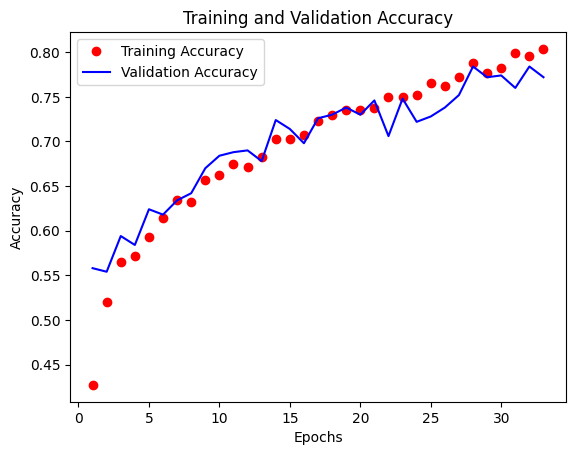

In [27]:
# Plotting Metrics
import matplotlib.pyplot as plt
epochs = range(1,34)
acc = history.history["acc"]
val_acc = history.history["val_acc"]
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(epochs,acc,'ro',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend()
plt.show()

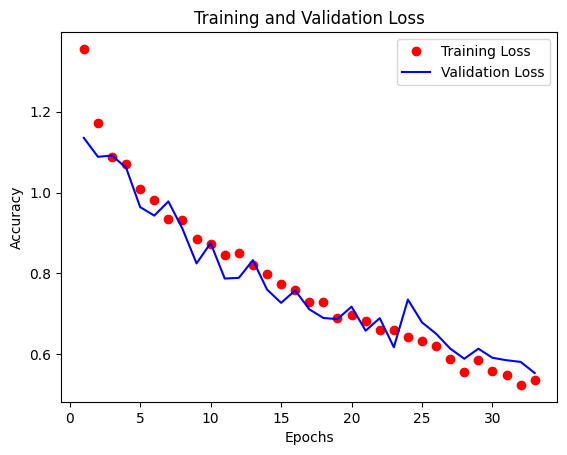

In [28]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(epochs,loss,'ro',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.legend()
plt.show()

In [29]:
test_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=50,
    image_size=(256,256)
)

Found 500 files belonging to 5 classes.


In [30]:
score = model.evaluate(test_data, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 3s 73ms/step - loss: 144.4908 - acc: 0.5440
Test loss: 144.49082946777344
Test accuracy: 0.5440000295639038


In [31]:
from PIL import Image

In [32]:
img1 = Image.open("/content/lilly.jpg")
img2 = Image.open("/content/orchid.jpg")
img3 = Image.open("/content/tulip.jpg")

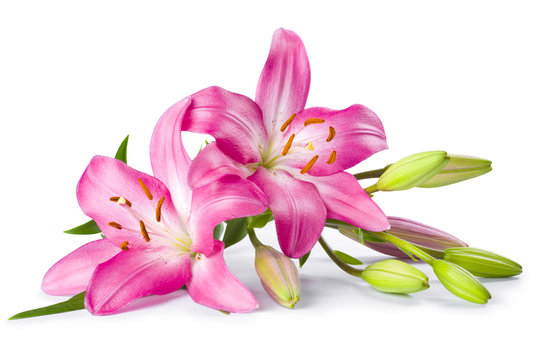

In [33]:
img1

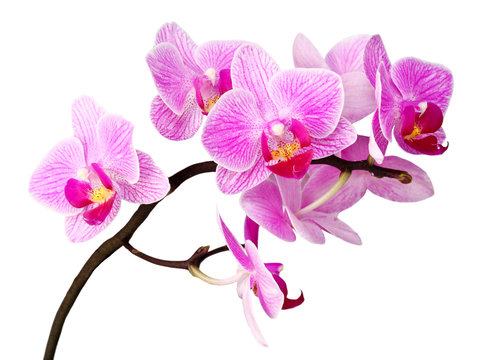

In [34]:
img2

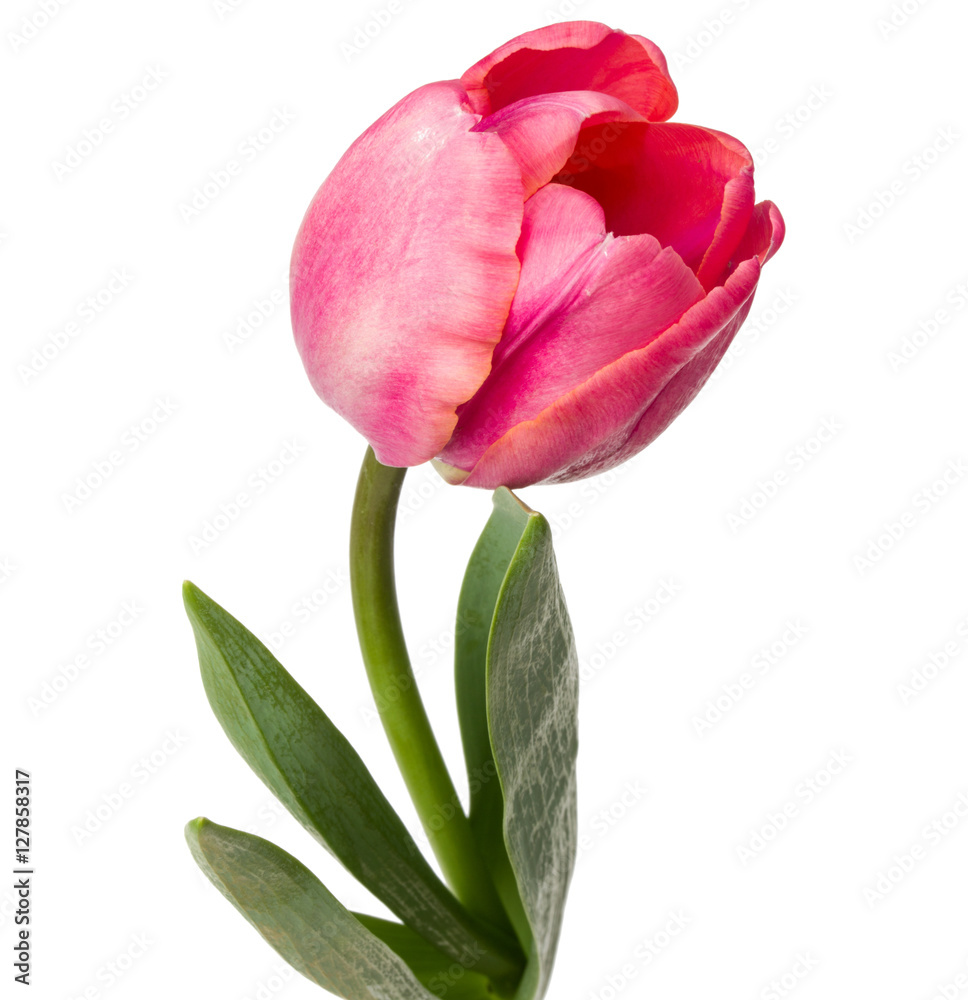

In [35]:
img3

In [41]:
for i,img in enumerate([img1,img2,img3]):
  img = img.resize((256,256))
  img = np.array(img)/255.0
  img = np.expand_dims(img, axis=0)
  pred= model.predict(img,verbose=0)
  labels={0:"Lilly",1:"Lotus",2:"Orchid",3:"Sunflower",4:"Tulip"}
  print("Img{} belongs to class {}".format(i,labels[np.argmax(pred)]))

Img0 belongs to class Lilly
Img1 belongs to class Orchid
Img2 belongs to class Tulip


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp -av "/content" "/content/drive/MyDrive/Colab Notebooks/5 Flower Classificataion"

'/content' -> '/content/drive/MyDrive/Colab Notebooks/5 Flower Classificataion'
'/content/sample_data' -> '/content/drive/MyDrive/Colab Notebooks/5 Flower Classificataion/sample_data'
'/content/sample_data/README.md' -> '/content/drive/MyDrive/Colab Notebooks/5 Flower Classificataion/sample_data/README.md'
'/content/sample_data/anscombe.json' -> '/content/drive/MyDrive/Colab Notebooks/5 Flower Classificataion/sample_data/anscombe.json'
'/content/sample_data/california_housing_test.csv' -> '/content/drive/MyDrive/Colab Notebooks/5 Flower Classificataion/sample_data/california_housing_test.csv'
'/content/sample_data/california_housing_train.csv' -> '/content/drive/MyDrive/Colab Notebooks/5 Flower Classificataion/sample_data/california_housing_train.csv'
'/content/sample_data/mnist_test.csv' -> '/content/drive/MyDrive/Colab Notebooks/5 Flower Classificataion/sample_data/mnist_test.csv'
'/content/sample_data/mnist_train_small.csv' -> '/content/drive/MyDrive/Colab Notebooks/5 Flower Classif